In [1]:
# v06 runs may finally have worked for 2D?
#  - fix nans in ET and wave forcing
#  - include structure-related time step flags, as has been done in 3D all along.

# v07,v08 bisect those changes.

# v08 still has the transient at 6/10
# v09 tries a generic structure, still has the transient at 6/10.
# v10 just started. uses a weir, and lots of output around the transient.

In [2]:
from stompy.grid import unstructured_grid, multi_ugrid
import numpy as np
import pandas as pd
import os
import xarray as xr
import stompy.model.delft.dflow_model as dfm
import stompy.model.delft.io as dio
import glob

import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
run_dir='data_2013-2d-slr2ft-v14' # should be proper 2D

In [35]:
import six
six.moves.reload_module(dfm)
model=dfm.DFlowModel.load(run_dir)

In [5]:
#map_ds=xr.open_dataset(run_dir+'/DFM_OUTPUT_flowfm/flowfm_map.nc')
#g=unstructured_grid.UnstructuredGrid.read_ugrid(map_ds)
map_ds=multi_ugrid.MultiUgrid(run_dir+'/DFM_OUTPUT_flowfm/*_map.nc')
g=map_ds.grid

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


In [33]:
map_ds.reload()

<IPython.core.display.Javascript object>


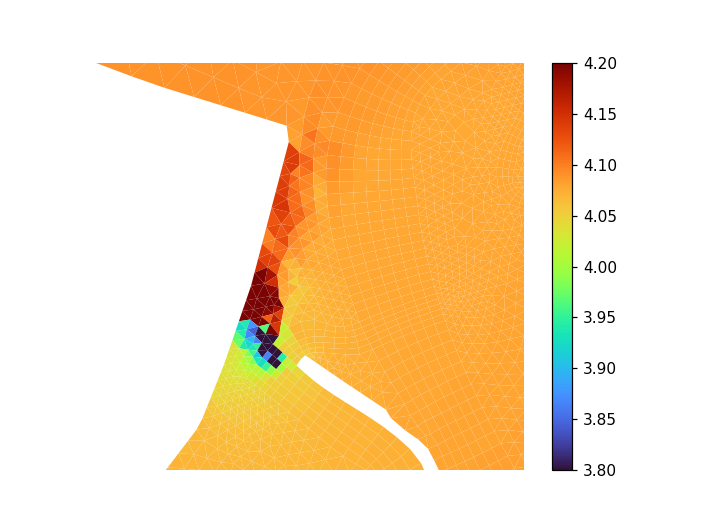

In [13]:
fig,ax=plt.subplots()

ax.set_adjustable('datalim')
ccoll=g.plot_cells(values=map_ds['mesh2d_s1'].isel(time=-1),
            cmap='turbo')
plt.colorbar(ccoll)
ax.axis('off')
ccoll.set_clim([3.8,4.2])
#ax.axis((551968.9679951352, 553310.6453882352, 4123859.484601603, 4124997.871990666))

<IPython.core.display.Javascript object>


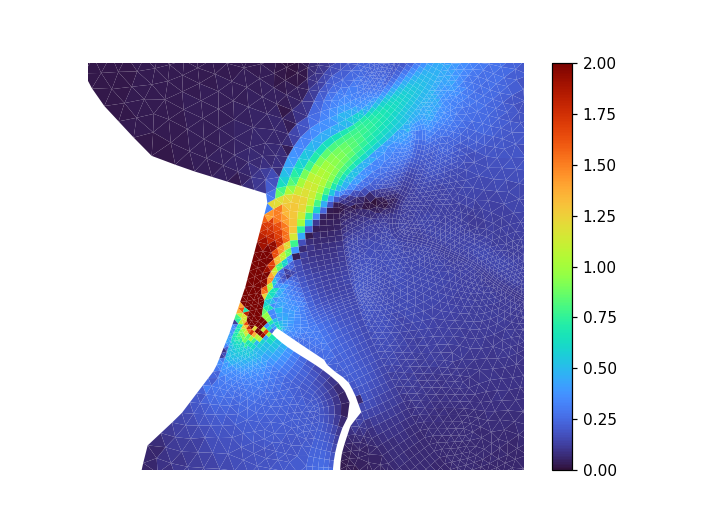

(551962.2152746613, 554066.6495507507, 4122750.3243895927, 4125365.499854582)

In [10]:
fig,ax=plt.subplots()

ax.set_adjustable('datalim')
ccoll=g.plot_cells(values=map_ds['mesh2d_ucmag'].isel(time=-1),
            cmap='turbo')
plt.colorbar(ccoll)
ax.axis('off')

In [11]:
ccoll.set_clim([0,2])

<IPython.core.display.Javascript object>


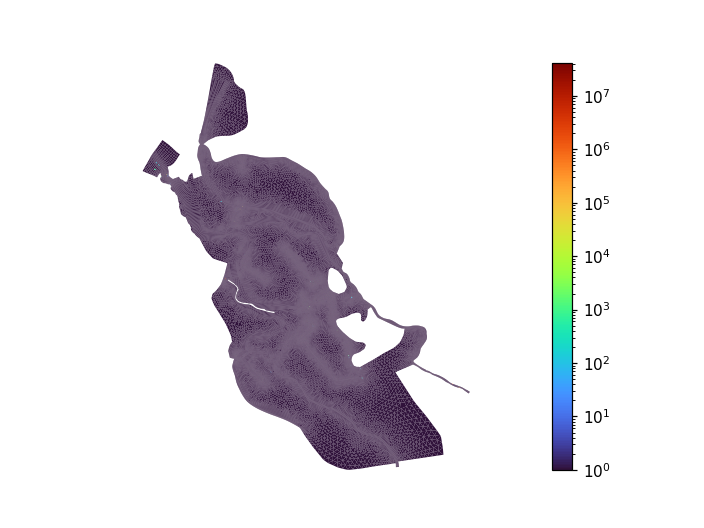

(551962.2152746613, 554066.6495507507, 4122750.3243895927, 4125365.499854582)

In [9]:
from matplotlib import colors
fig,ax=plt.subplots()

ax.set_adjustable('datalim')
ccoll=g.plot_cells(values=map_ds['mesh2d_Numlimdt'].isel(time=-1).values.clip(1),
                   cmap='turbo',norm=colors.LogNorm(vmin=1))
plt.colorbar(ccoll)
ax.axis('off')

In [10]:
his_ds.close()

In [34]:
his_ds

<xarray.Dataset>
Dimensions:                                       (cross_section: 10, gategens: 2, general_structures: 3, nFlowElemContourPts: 4, nFlowElemWithBnd: 2993, nFlowLink: 4536, nFlowLinkPts: 2, nNetLink: 4687, nNetLinkPts: 2, source_sink: 2, source_sink_geom_nNodes: 4, source_sink_pts: 3, station_geom_nNodes: 145, stations: 145, time: 30552, weirgens: 1, weirs: 1)
Coordinates:
    station_x_coordinate                          (stations) float64 ...
    station_y_coordinate                          (stations) float64 ...
    station_name                                  (stations) |S256 b'pch_up                                                                                                                                                                                                                                                          ' ... b'seepageB                                                                                                                          

In [14]:
his_ds=xr.open_dataset(run_dir+"/DFM_OUTPUT_flowfm/flowfm_0000_his.nc")

In [36]:
his_ds=model.his_dataset(decode_geometry=False)

Yuck - duplicate cross section names


In [32]:
list(his_ds)

['FlowElem_xcc',
 'FlowElem_ycc',
 'FlowElem_zcc',
 'FlowElem_bac',
 'FlowElem_xzw',
 'FlowElem_yzw',
 'FlowElemContour_x',
 'FlowElemContour_y',
 'FlowElem_bl',
 'ElemLink',
 'FlowLink',
 'FlowLinkType',
 'FlowLink_xu',
 'FlowLink_yu',
 'projected_coordinate_system',
 'FlowLink_lonu',
 'FlowLink_latu',
 'FlowElemDomain',
 'FlowLinkDomain',
 'FlowElemGlobalNr',
 'station_id',
 'station_geom',
 'station_geom_node_count',
 'station_geom_node_coordx',
 'station_geom_node_coordy',
 'waterlevel',
 'bedlevel',
 'x_velocity',
 'y_velocity',
 'velocity_magnitude',
 'discharge_magnitude',
 'taus',
 'windx',
 'windy',
 'rain',
 'cross_section_geom',
 'cross_section_geom_node_count',
 'cross_section_discharge',
 'cross_section_cumulative_discharge',
 'cross_section_area',
 'cross_section_velocity',
 'source_sink_geom',
 'source_sink_geom_node_count',
 'source_sink_geom_node_coordx',
 'source_sink_geom_node_coordy',
 'source_sink_x_coordinate',
 'source_sink_y_coordinate',
 'source_sink_prescribed

In [37]:
his_ds.weirgens

<xarray.DataArray 'weirgens' (weirgens: 1)>
array(['butano_weir'], dtype='<U11')
Coordinates:
    weirgen_id  (weirgens) |S256 b'butano_weir                                                                                                                                                                                                                                                     '
  * weirgens    (weirgens) <U11 'butano_weir'

<IPython.core.display.Javascript object>


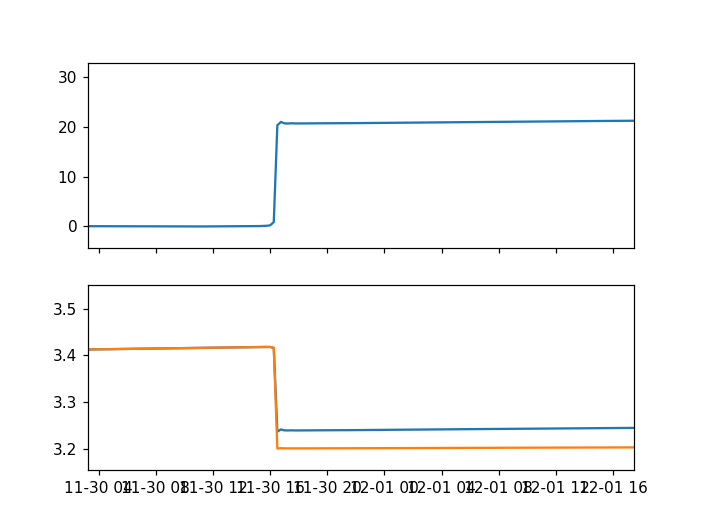

In [40]:
fig,axs=plt.subplots(2,1,sharex=True)

axs[0].plot(his_ds.time, his_ds.weirgen_discharge.sel(weirgens='butano_weir'))
axs[1].plot(his_ds.time, his_ds.weirgen_s1up.sel(weirgens='butano_weir'))
axs[1].plot(his_ds.time, his_ds.weirgen_s1dn.sel(weirgens='butano_weir'))


In [12]:
qcm_pre2016=pd.read_csv("../../data/ESA_QCM/ESA_draft_PescaderoQCM_output.csv",
                                    skiprows=[0],usecols=range(7),
                                    parse_dates=['Date (PST)'])
qcm=qcm_pre2016
qcm['time']=qcm['Date (PST)'] + np.timedelta64(8,'h') # Shift to UTC.

crest_tim=dio.read_dfm_tim(run_dir+'/mouth_CrestLevel.tim',ref_time=np.datetime64('2013-03-22 00:00'))
crestB_tim=dio.read_dfm_tim(run_dir+'/mouth_B_CrestLevel.tim',ref_time=np.datetime64('2013-03-22 00:00'))

ocean_tim=dio.read_dfm_tim(run_dir+'/ocean_bc_0001.tim',ref_time=np.datetime64('2013-03-22 00:00'))

<IPython.core.display.Javascript object>


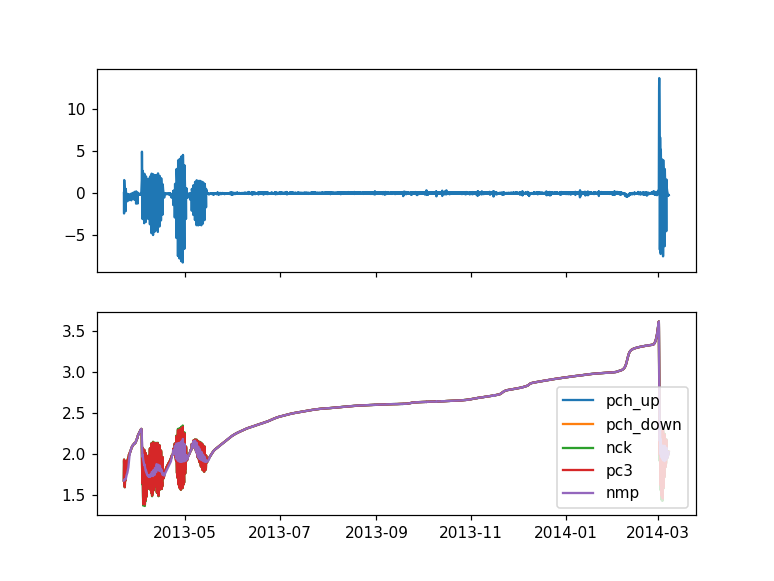

In [13]:
fig,axs=plt.subplots(2,1,sharex=True)

#axs[0].plot(his_ds.time, his_ds.gategen_discharge.isel(gategens=0),label='pch_gate')
axs[0].plot(his_ds.time, -his_ds.cross_section_discharge.isel(cross_section=3),label='n_complex_xs')

#axs[1].plot(his_ds.time, his_ds.gategen_s1up.isel(gategens=0),label='pch_gate s1up')
#axs[1].plot(his_ds.time, his_ds.gategen_s1dn.isel(gategens=0),label='pch_gate s1dn')

axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=0),label='pch_up')
axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=1),label='pch_down')
axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=7),label='nck')
axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=10),label='pc3')
axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=11),label='nmp')

#axs[1].plot(his_ds.time, his_ds.waterlevel.isel(stations=16),label='ocean')
#axs[1].plot(crest_tim.time, crest_tim.val1,label='Mouth crest')

#axs[0].plot(map_ds.time, np.zeros(len(map_ds.time)), 'go')

axs[1].legend(loc='lower right')

In [15]:
his_slr0_ds=xr.open_dataset(run_dir.replace('slr2ft','slr0ft')+"/DFM_OUTPUT_flowfm/flowfm_0000_his.nc")

<IPython.core.display.Javascript object>


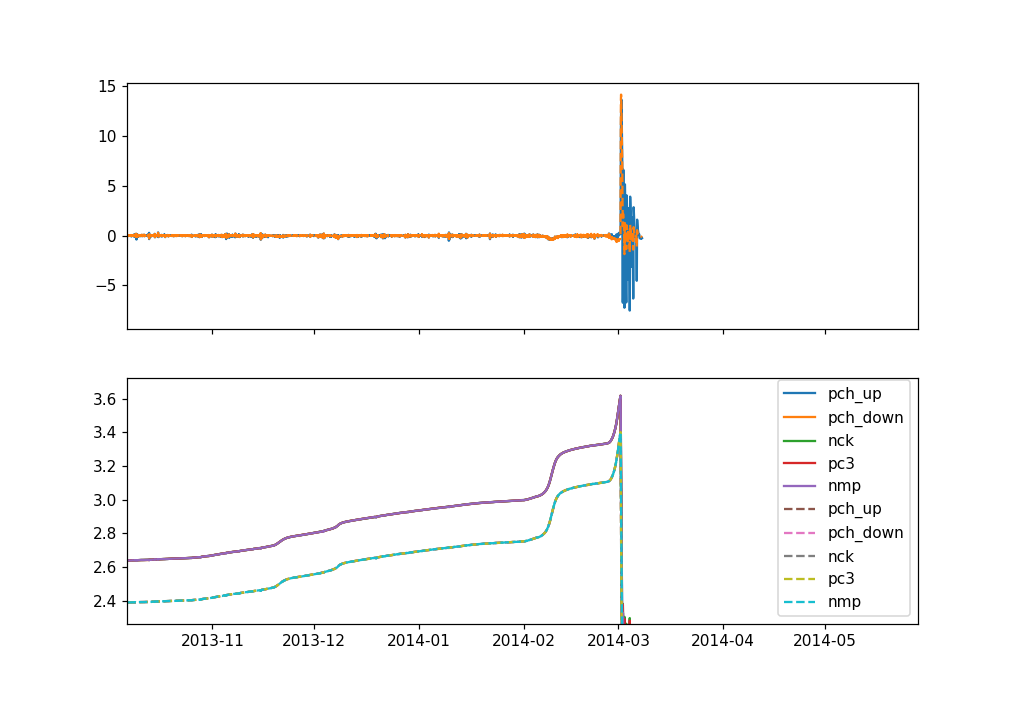

In [17]:
# Quick comparison of slr0ft and slr2ft
fig,axs=plt.subplots(2,1,sharex=True)

for h,ls in zip([his_ds,his_slr0_ds],['-','--']):
    axs[0].plot(h.time, -h.cross_section_discharge.isel(cross_section=3),ls=ls,label='n_complex_xs')
    axs[1].plot(h.time, h.waterlevel.isel(stations=0),ls=ls,label='pch_up')
    axs[1].plot(h.time, h.waterlevel.isel(stations=1),ls=ls,label='pch_down')
    axs[1].plot(h.time, h.waterlevel.isel(stations=7),ls=ls,label='nck')
    axs[1].plot(h.time, h.waterlevel.isel(stations=10),ls=ls,label='pc3')
    axs[1].plot(h.time, h.waterlevel.isel(stations=11),ls=ls,label='nmp')

axs[1].legend(loc='lower right')

In [ ]:
# While tidal, things look fine. But then we get some weird blips say around 6/10. the downstream
# side (s1dn and pch_down) dip. presumably due to partial breach?
# at the same time, pch_up actually jumps up.  Why? 
# I think this is a DFM bug. 
# the run does complete in v06, but this feature is weird.
# The mouth time series, ocean BC time series, water balance time series,
# all show nothing odd at this time.
# The first sign of weirdness is, simultaneously, pch_up rises, pch_gate s1up 
# falls (?), and both of the downstream water levels fall, with the downstream
# side of the gate falling more.
# there is no disturbance at the mouth
# appears that the sign convention for gate discharge is positive downstream
# The discharge time series is sort of twitchy - is that instability, or
# some forcing term like wind?
# Oddly, pch_up jumps up, while gate s1up drops
# What about other nearby stations? They react to this, but no sudden 
# jumps. points to numerical or config issues at the culverts.

# In the v14 slr2ft run, flow eventually starts going around the butano flow control
# structure at high rate, killing the timestep.
